# Čiščenje podatkov

In [30]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import seaborn as sns
import os.path
from sklearn.neighbors import LocalOutlierFactor

In [31]:
path = "./data_cleaned/"

panj = pd.read_csv(r'./data_cleaned/panj.csv')
panj2 = pd.read_csv(r'./data_cleaned/panj2.csv')
vreme = pd.read_csv(r'./data_cleaned/vreme.csv')

Odstranitev osamelcev (outlier removal)

In [32]:
panj.head()

,Unnamed: 0,resId,siteNo,hiveNo,frameNo,hour,paramText,anMethText,resVal,resUnit,resUnit_desc,resValUncert,resValUncertSD,resQualValue,date
0,151242,CW207717,3,1,NaN,6,Colony weight,Automatic recording,24.7,G167A,Kilogram,NaN,NaN,NaN,2019-05-29 06:00:00
1,151243,CW207716,3,1,NaN,5,Colony weight,Automatic recording,24.7,G167A,Kilogram,NaN,NaN,NaN,2019-05-29 05:00:00
2,151244,CW207715,3,1,NaN,4,Colony weight,Automatic recording,24.7,G167A,Kilogram,NaN,NaN,NaN,2019-05-29 04:00:00
3,151245,CW207714,3,1,NaN,3,Colony weight,Automatic recording,24.7,G167A,Kilogram,NaN,NaN,NaN,2019-05-29 03:00:00
4,151246,CW207713,3,1,NaN,2,Colony weight,Automatic recording,24.7,G167A,Kilogram,NaN,NaN,NaN,2019-05-29 02:00:00


In [33]:
"""def replace_outliers_with_average(df, column_name, threshold=3):
    # Copy the DataFrame to avoid modifying the original data
    cleaned_df = df.copy()
    
    # Calculate the mean and standard deviation of the column
    mean = cleaned_df[column_name].mean()
    std = cleaned_df[column_name].std()
    
    # Calculate the Z-scores for each data point
    z_scores = np.abs((cleaned_df[column_name] - mean) / std)
    
    # Identify the outliers based on the threshold
    outliers = z_scores > threshold
    
    # Replace the outliers with the average of the previous and next value
    previous_values = cleaned_df[column_name].shift(1)
    next_values = cleaned_df[column_name].shift(-1)
    cleaned_df.loc[outliers, column_name] = (previous_values[outliers] + next_values[outliers]) / 2
    
    return cleaned_df"""

'def replace_outliers_with_average(df, column_name, threshold=3):\n    # Copy the DataFrame to avoid modifying the original data\n    cleaned_df = df.copy()\n    \n    # Calculate the mean and standard deviation of the column\n    mean = cleaned_df[column_name].mean()\n    std = cleaned_df[column_name].std()\n    \n    # Calculate the Z-scores for each data point\n    z_scores = np.abs((cleaned_df[column_name] - mean) / std)\n    \n    # Identify the outliers based on the threshold\n    outliers = z_scores > threshold\n    \n    # Replace the outliers with the average of the previous and next value\n    previous_values = cleaned_df[column_name].shift(1)\n    next_values = cleaned_df[column_name].shift(-1)\n    cleaned_df.loc[outliers, column_name] = (previous_values[outliers] + next_values[outliers]) / 2\n    \n    return cleaned_df'

In [34]:
"""def replace_outliers_lof(df, column_name, contamination=0.1):
    # Copy the DataFrame to avoid modifying the original data
    cleaned_df = df.copy()
    
    # Fit the Local Outlier Factor model
    lof = LocalOutlierFactor(contamination=contamination)
    outliers = lof.fit_predict(cleaned_df[[column_name]])
    
    # Replace the outliers with the median value
    cleaned_df.loc[outliers == -1, column_name] = cleaned_df[column_name].median()
    
    return cleaned_df"""

'def replace_outliers_lof(df, column_name, contamination=0.1):\n    # Copy the DataFrame to avoid modifying the original data\n    cleaned_df = df.copy()\n    \n    # Fit the Local Outlier Factor model\n    lof = LocalOutlierFactor(contamination=contamination)\n    outliers = lof.fit_predict(cleaned_df[[column_name]])\n    \n    # Replace the outliers with the median value\n    cleaned_df.loc[outliers == -1, column_name] = cleaned_df[column_name].median()\n    \n    return cleaned_df'

In [35]:
plt.plot(panj['date'], panj['resVal'], '*')

Error in callback <function _draw_all_if_interactive at 0x000001C26EB739C0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
"""panj = replace_outliers_lof(panj, "resVal", contamination=0.01)"""

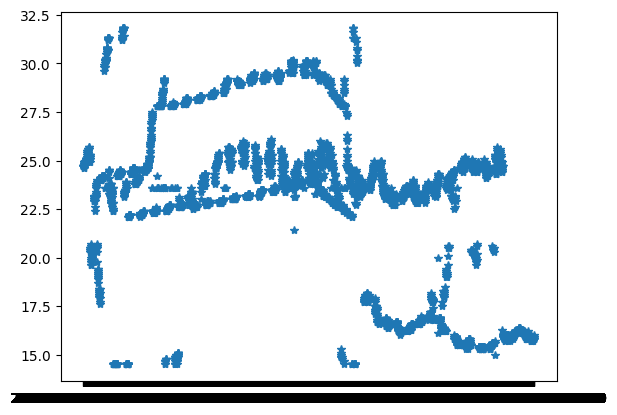

In [ ]:
plt.plot(panj['date'], panj['resVal'], '*')""""""